In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
os.getcwd()
os.listdir()


['.ipynb_checkpoints',
 'lab3_results_U20230075.ipynb',
 'news_articles.csv',
 'test_users.csv',
 'train_users.csv']

Data loading 

In [4]:
train_users = pd.read_csv("train_users.csv")
test_users = pd.read_csv("test_users.csv")

train_users.head()


,user_id,age,income,clicks,purchase_amount,label
0,1,28,58242,81,378.38,user3
1,2,28,38225,21,114.50,user3
2,3,39,95017,41,66.24,user2
3,4,52,33473,98,496.88,user3
4,5,29,80690,5,293.24,user1


In [5]:
train_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2000 non-null   int64  
 1   age              2000 non-null   int64  
 2   income           2000 non-null   int64  
 3   clicks           2000 non-null   int64  
 4   purchase_amount  2000 non-null   float64
 5   label            2000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


Data Preprocessing

In [6]:
train_users.isnull().sum()


user_id            0
age                0
income             0
clicks             0
purchase_amount    0
label              0
dtype: int64

In [7]:
train_users.fillna(train_users.mode().iloc[0], inplace=True)
test_users.fillna(test_users.mode().iloc[0], inplace=True)


In [9]:
train_users.columns


Index(['user_id', 'age', 'income', 'clicks', 'purchase_amount', 'label'], dtype='object')

In [10]:
for col in train_users.columns:
    print(col, train_users[col].unique())


user_id [   1    2    3 ... 1998 1999 2000]
age [28 39 52 29 47 57 21 44 53 43 38 45 25 34 51 48 32 18 19 23 31 24 58 46
 36 33 20 40 55 27 59 41 26 42 49 54 22 50 37 35 30 56]
income [58242 38225 95017 ... 55543 31826 66997]
clicks [81 21 41 98  5  7 84 74 97 90 93 79 59 66 67 48 38 10 80  3 15 61  9 69
 86 16 96  8 36 29 72 64 52 95 18  6 12 14 22 54 37 39 63 85 87 47 50 30
 13 32 27 71 53 33 31 49 62 11 28 68 57 25 89 58  2 73 91 70 55 44 17 23
 40 34 26 65 83 19 99 42 60 24 35 88 43 78 76 92 82 46  1 51 75 56  0 45
 77 20  4 94]
purchase_amount [378.38 114.5   66.24 ... 210.85 356.95 153.03]
label ['user3' 'user2' 'user1']


In [18]:
X_train = train_users.drop("label", axis=1)
y_train = train_users["label"]

X_test = test_users.drop("label", axis=1)
y_test = test_users["label"]


training

In [19]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(
    X_test,
    join="left",
    axis=1,
    fill_value=0
)


In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("User Classification Accuracy:", accuracy)


User Classification Accuracy: 0.334


 Data Accuracy

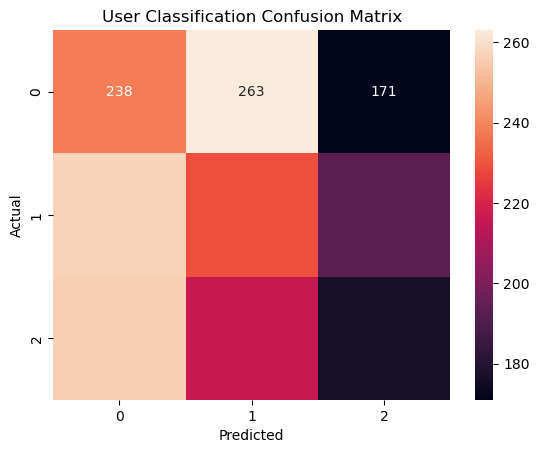

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("User Classification Confusion Matrix")
plt.show()
